In [1]:
import pandas as pd
from datetime import datetime
import itertools
import numpy as np
from io import StringIO
import math
import scipy.stats.stats as stats
import matplotlib.pyplot as plt 
import pickle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import LeaveOneGroupOut
from sklearn import metrics, svm, neighbors, linear_model, tree
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
df = pd.read_csv("Analysis-NoTimeShift-Activity-Sorted.csv")


In [3]:
df.head()


,Unnamed: 0,subject,activity,raw acc data,x,y,z,magnitude,running x,running y,...,z fft bin 9,x noise min,y noise min,z noise min,x noise max,y noise max,z noise max,x noise std,y noise std,z noise std
0,0,114,201,"[[0.07400000000000001, -0.89500000000000002, 0...","[0.07400000000000001, 0.070000000000000007, 0....","[-0.89500000000000002, -0.88300000000000001, -...","[0.43799999999999994, 0.41799999999999998, 0.4...","[0.9991721573382637, 0.9794452511498537, 0.984...",[ 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0....,[-0.45 -0.49 -0.54 -0.58 -0.63 -0.67 -0.72 -0....,...,0.263667,-0.10830,-0.47810,-0.10490,0.14910,0.07475,0.24555,0.061450,0.140260,0.067425
1,1,114,201,"[[-0.039, -1.1599999999999999, 0.5939999999999...","[-0.039, 0.0080000000000000002, -0.20300000000...","[-1.1599999999999999, -0.97999999999999998, -0...","[0.59399999999999997, 0.83999999999999997, 0.7...","[1.3038239911889948, 1.2907610158352318, 1.161...",[-0.02 -0.02 0.01 0.01 0.01 0.01 0.02 0....,[-0.37 -0.42 -0.49 -0.55 -0.58 -0.62 -0.66 -0....,...,0.351000,-0.39195,-0.78700,-0.37135,0.69425,0.40145,0.80150,0.188313,0.282239,0.264855
2,2,114,301,"[[0.223, -0.66400000000000003, 0.9020000000000...","[0.223, 0.24199999999999999, 0.233999999999999...","[-0.66400000000000003, -0.71499999999999997, -...","[0.90200000000000002, 0.80099999999999993, 0.7...","[1.1420284584895422, 1.1006316368340499, 1.116...",[ 0.1 0.11 0.12 0.13 0.14 0.16 0.17 0....,[-0.43 -0.47 -0.52 -0.57 -0.62 -0.67 -0.71 -0....,...,0.425833,-0.21085,-0.37080,-0.19250,0.15555,0.14615,0.61410,0.074228,0.119320,0.147130
3,3,114,101,"[[0.24600000000000002, -0.78900000000000003, 0...","[0.24600000000000002, 0.125, 0.354999999999999...","[-0.78900000000000003, -0.77000000000000002, -...","[0.54299999999999993, 0.621, 0.645000000000000...","[0.9888811859874774, 0.9970787330998491, 1.140...",[ 0.12 0.13 0.14 0.15 0.16 0.15 0.14 0....,[-0.42 -0.46 -0.5 -0.55 -0.59 -0.63 -0.67 -0....,...,0.545500,-0.27475,-0.40325,-0.18435,0.24025,0.50990,0.38295,0.100871,0.148942,0.130371
4,4,114,101,"[[0.17600000000000002, -0.85499999999999998, 0...","[0.17600000000000002, 0.17600000000000002, 0.1...","[-0.85499999999999998, -0.86699999999999999, -...","[0.45299999999999996, 0.44500000000000001, 0.4...","[0.983468352312366, 0.9902979349670482, 0.9657...",[ 0.08 0.09 0.09 0.11 0.13 0.13 0.13 0....,[-0.43 -0.48 -0.52 -0.57 -0.62 -0.67 -0.71 -0....,...,0.468167,-0.33510,-0.56955,-0.16830,0.25245,0.18820,0.36680,0.107441,0.150660,0.115344


In [4]:
df=df.rename(columns = {'0':'subject', '1':'activity', '2':'raw acc data'})


In [5]:
df.head()

,Unnamed: 0,subject,activity,raw acc data,x,y,z,magnitude,running x,running y,...,z fft bin 9,x noise min,y noise min,z noise min,x noise max,y noise max,z noise max,x noise std,y noise std,z noise std
0,0,114,201,"[[0.07400000000000001, -0.89500000000000002, 0...","[0.07400000000000001, 0.070000000000000007, 0....","[-0.89500000000000002, -0.88300000000000001, -...","[0.43799999999999994, 0.41799999999999998, 0.4...","[0.9991721573382637, 0.9794452511498537, 0.984...",[ 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0....,[-0.45 -0.49 -0.54 -0.58 -0.63 -0.67 -0.72 -0....,...,0.263667,-0.10830,-0.47810,-0.10490,0.14910,0.07475,0.24555,0.061450,0.140260,0.067425
1,1,114,201,"[[-0.039, -1.1599999999999999, 0.5939999999999...","[-0.039, 0.0080000000000000002, -0.20300000000...","[-1.1599999999999999, -0.97999999999999998, -0...","[0.59399999999999997, 0.83999999999999997, 0.7...","[1.3038239911889948, 1.2907610158352318, 1.161...",[-0.02 -0.02 0.01 0.01 0.01 0.01 0.02 0....,[-0.37 -0.42 -0.49 -0.55 -0.58 -0.62 -0.66 -0....,...,0.351000,-0.39195,-0.78700,-0.37135,0.69425,0.40145,0.80150,0.188313,0.282239,0.264855
2,2,114,301,"[[0.223, -0.66400000000000003, 0.9020000000000...","[0.223, 0.24199999999999999, 0.233999999999999...","[-0.66400000000000003, -0.71499999999999997, -...","[0.90200000000000002, 0.80099999999999993, 0.7...","[1.1420284584895422, 1.1006316368340499, 1.116...",[ 0.1 0.11 0.12 0.13 0.14 0.16 0.17 0....,[-0.43 -0.47 -0.52 -0.57 -0.62 -0.67 -0.71 -0....,...,0.425833,-0.21085,-0.37080,-0.19250,0.15555,0.14615,0.61410,0.074228,0.119320,0.147130
3,3,114,101,"[[0.24600000000000002, -0.78900000000000003, 0...","[0.24600000000000002, 0.125, 0.354999999999999...","[-0.78900000000000003, -0.77000000000000002, -...","[0.54299999999999993, 0.621, 0.645000000000000...","[0.9888811859874774, 0.9970787330998491, 1.140...",[ 0.12 0.13 0.14 0.15 0.16 0.15 0.14 0....,[-0.42 -0.46 -0.5 -0.55 -0.59 -0.63 -0.67 -0....,...,0.545500,-0.27475,-0.40325,-0.18435,0.24025,0.50990,0.38295,0.100871,0.148942,0.130371
4,4,114,101,"[[0.17600000000000002, -0.85499999999999998, 0...","[0.17600000000000002, 0.17600000000000002, 0.1...","[-0.85499999999999998, -0.86699999999999999, -...","[0.45299999999999996, 0.44500000000000001, 0.4...","[0.983468352312366, 0.9902979349670482, 0.9657...",[ 0.08 0.09 0.09 0.11 0.13 0.13 0.13 0....,[-0.43 -0.48 -0.52 -0.57 -0.62 -0.67 -0.71 -0....,...,0.468167,-0.33510,-0.56955,-0.16830,0.25245,0.18820,0.36680,0.107441,0.150660,0.115344


In [6]:
df.subject.unique()

array([ 114.,  122.,  115.,  104.,  111.,  107.,  112.,  102.,  118.,
        110.,  103.,  105.,  109.,  117.,  108.,  113.,  120.,  101.,
        123.,  106.,  124.,  119.,  116.,  121.])

In [7]:
Y = df['activity']

In [8]:
features = ['max', 'min', 'std', 'skew', 'kurtosis', 'mean', 'median', 'x max', 'y max', 'z max', 'x min', 'y min', 'z min', 'x mean', 'y mean', 'z mean', 'x median', 'y median', 'z median', 'x skew', 'y skew', 'z skew', 'x kurtosis', 'y kurtosis', 'z kurtosis', 'x std', 'y std', 'z std', 'xy mean', 'yz mean', 'xz mean','x fft min', 'y fft min', 'z fft min', 'x fft max', 'y fft max', 'z fft max', 'x fft std', 'y fft std', 'z fft std', 'x fft mean', 'y fft mean', 'z fft mean', 'x fft median', 'y fft median', 'z fft median', 'x fft mean weighted', 'y fft mean weighted', 'z fft mean weighted', 'x fft bin 1', 'x fft bin 10', 'x fft bin 2', 'x fft bin 3', 'x fft bin 4', 'x fft bin 5', 'x fft bin 6', 'x fft bin 7', 'x fft bin 8', 'x fft bin 9', 'y fft bin 1', 'y fft bin 10', 'y fft bin 2', 'y fft bin 3', 'y fft bin 4', 'y fft bin 5', 'y fft bin 6', 'y fft bin 7', 'y fft bin 8', 'y fft bin 9', 'z fft bin 1', 'z fft bin 10', 'z fft bin 2', 'z fft bin 3', 'z fft bin 4', 'z fft bin 5', 'z fft bin 6', 'z fft bin 7', 'z fft bin 8', 'z fft bin 9','x noise min', 'y noise min', 'z noise min', 'x noise max', 'y noise max', 
'z noise max', 'x noise std', 'y noise std', 'z noise std']
#features_ind = list(range(16,104))
X = df[features]
feature_names = X.columns.tolist()
print(len(feature_names))
print(feature_names)
groups = df.subject.unique()
X.head()

88
['max', 'min', 'std', 'skew', 'kurtosis', 'mean', 'median', 'x max', 'y max', 'z max', 'x min', 'y min', 'z min', 'x mean', 'y mean', 'z mean', 'x median', 'y median', 'z median', 'x skew', 'y skew', 'z skew', 'x kurtosis', 'y kurtosis', 'z kurtosis', 'x std', 'y std', 'z std', 'xy mean', 'yz mean', 'xz mean', 'x fft min', 'y fft min', 'z fft min', 'x fft max', 'y fft max', 'z fft max', 'x fft std', 'y fft std', 'z fft std', 'x fft mean', 'y fft mean', 'z fft mean', 'x fft median', 'y fft median', 'z fft median', 'x fft mean weighted', 'y fft mean weighted', 'z fft mean weighted', 'x fft bin 1', 'x fft bin 10', 'x fft bin 2', 'x fft bin 3', 'x fft bin 4', 'x fft bin 5', 'x fft bin 6', 'x fft bin 7', 'x fft bin 8', 'x fft bin 9', 'y fft bin 1', 'y fft bin 10', 'y fft bin 2', 'y fft bin 3', 'y fft bin 4', 'y fft bin 5', 'y fft bin 6', 'y fft bin 7', 'y fft bin 8', 'y fft bin 9', 'z fft bin 1', 'z fft bin 10', 'z fft bin 2', 'z fft bin 3', 'z fft bin 4', 'z fft bin 5', 'z fft bin 6', '

,max,min,std,skew,kurtosis,mean,median,x max,y max,z max,...,z fft bin 9,x noise min,y noise min,z noise min,x noise max,y noise max,z noise max,x noise std,y noise std,z noise std
0,1.096704,0.879901,0.035263,-0.256016,2.947613,0.996619,0.994714,0.320,-0.836,0.465,...,0.263667,-0.10830,-0.47810,-0.10490,0.14910,0.07475,0.24555,0.061450,0.140260,0.067425
1,1.777750,0.444051,0.296776,0.469835,-0.145111,1.027260,1.013155,0.688,-0.398,1.309,...,0.351000,-0.39195,-0.78700,-0.37135,0.69425,0.40145,0.80150,0.188313,0.282239,0.264855
2,1.181703,0.846446,0.062314,0.095966,0.463856,1.016351,1.005488,0.441,-0.664,0.902,...,0.425833,-0.21085,-0.37080,-0.19250,0.15555,0.14615,0.61410,0.074228,0.119320,0.147130
3,1.227883,0.775228,0.077944,0.459561,1.728157,1.000864,0.990655,0.355,-0.254,1.000,...,0.545500,-0.27475,-0.40325,-0.18435,0.24025,0.50990,0.38295,0.100871,0.148942,0.130371
4,1.251106,0.838346,0.088783,0.490714,-0.105809,1.007371,0.988382,0.355,-0.668,0.734,...,0.468167,-0.33510,-0.56955,-0.16830,0.25245,0.18820,0.36680,0.107441,0.150660,0.115344


In [9]:
# features analysis
def select_features(X, Y, plot=False):
    forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
    
    feature_names = X.columns.tolist()

#     X = data[feature_names]
#     Y = data['activity']

    forest.fit(X, Y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
    indices = np.argsort(importances)[::-1]
    
    importances = np.array(importances)
    importances /= importances.max()

    if plot:
        for f in range(X.shape[1]):
            print("%d. feature '%s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))


        # Plot the feature importances of the forest
        plt.figure()
        plt.title("Feature importances")
        plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
        plt.xticks(range(X.shape[1]), indices)
        plt.xlim([-1, X.shape[1]])
        plt.show()
        
    # select features > 25 % importance
    features = [i for i,j in zip(feature_names,importances) if j > 0.25]

    print ("Selected number of features: %d" % len(features))

    if plot:
        for f in range(len(features)):
            print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))
        
    return features

In [10]:
class_names = [101, 103, 104, 201, 301, 302, 303, 304]
print(class_names)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

   
    print('Confusion matrix')

    

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[101, 103, 104, 201, 301, 302, 303, 304]


In [11]:
# grid search with cross-validation (subject-wise or k-folds) for picking hyperparameters
# returns list with best estimators
# params:
# X_train - training data
# y_train - labels
# kfoldcv - true to use 10-fold cross-validation
# display - boolean for printing out cross-validation info
def grid(X_train,y_train, display=False, kfoldcv=True):
    # Different models to try
    #       Model name ---------------------------------------------------------------------
    #      Parameters ------------------------------------------                           |
    #     Classifier -----------                               |                           |
    #                          |                               |                           |
    #                          v                               v                           |
    models = [[tree.DecisionTreeClassifier(), {'min_samples_split': [2, 4, 6, 8, 10],#    |
                                               'min_samples_leaf': [1, 5, 10, 15, 20],#     v
                                               'max_depth': [10, 20, 30, 40, 50]},       "Decision Tree"]
              ]

    #models.append([linear_model.LogisticRegression(), {'C': [1e+4, 1e+3, 1e+2, 1e+1, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]}, "Logistic Regression with Ridge Penalty"])

#     models.append([linear_model.LogisticRegression(penalty='l1'), {'C': [100, 10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]}, "Logistic Regression with Lasso Penalty"])

    # LinearSVC
    #models.append([svm.SVC(kernel='rbf'), { # class_weight="balanced"; tol 
                              #'gamma': [1e+4, 1e+3, 1e+2, 1e+1, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6], 
                               #'C': [1e+4, 1e+3, 1e+2, 1e+1, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]}, "SVM rbf"])
    
    #models.append([neighbors.KNeighborsClassifier(), {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}, "K-Nearest Neighbors"])


    #models = [[RandomForestClassifier(), {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 350, 400]
                                               #}, "Random Forest"]]

    models_with_best_params = []

    # cross-validation strategy
    # Leave One Group Out
    groups = y_train.unique()
    logo = LeaveOneGroupOut()
    cv = logo.get_n_splits(X_train,y_train,groups)
    
    # for 10-folds cross-validation
    if kfoldcv:
        cv = 10 

    for model in models:
        clf = GridSearchCV(model[0], model[1], cv = cv)
        clf.fit(X_train, y_train)
        best_params = clf.best_params_
        best_estimator = clf.best_estimator_

        model_with_best_params = [best_estimator, best_params, model[2]]

        models_with_best_params.append(model_with_best_params)

        if (display):
            print(model[2], ": ")
            print("Best score for ", model[2], ":", clf.best_score_)
            print()
            print("Best parameters for ", model[2], " found on development set:", best_params)
    #         print()
    #         print("Best estimator for ", model[2], " model:", best_estimator)
            print()
    #         print()

    #         print("Grid scores on development set:")
    #         print()
    #         for params, mean_score, scores in clf.grid_scores_:
    #             print("%0.3f (+/-%0.03f) for %r"
    #                   % (mean_score, scores.std() * 2, params))
            print()

    #     print(models_with_best_params)
    
#     return best_params['n_estimators']
    return  models_with_best_params

In [12]:
test_classifiers = []
def test_classifier (model, X_train, y_train, X_test, y_test):
#     classifier = RandomForestClassifier(n_estimators=pram)
    classifier = model[0]
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    #print("Prediction accuracy for", model[2], "model is", score)
    expected = y_test
    predicted = classifier.predict(X_test)

    print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted, digits=5)))
    #Compute confusion matrix
    cnf_matrix = confusion_matrix(expected, predicted)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plt.figure(figsize=(9,9))
    plot_confusion_matrix(cnf_matrix, classes=class_names,
    title='Confusion matrix, without normalization: ' + model[2])

    plt.show()
    test_classifiers.append([metrics.f1_score(expected,predicted, average='weighted'), cnf_matrix])
    return [metrics.f1_score(expected,predicted, average='weighted'), cnf_matrix]

Number of subjects:  24
114.0
Selected number of features: 88
Train set size after feature selection:  (3326, 88)
Test set size after feature selection:  (43, 88)
Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'):
             precision    recall  f1-score   support

      101.0    0.44000   0.64706   0.52381        17
      104.0    0.00000   0.00000   0.00000         0
      201.0    0.40000   0.12500   0.19048        16
      301.0    0.20000   0.20000   0.20000        10
      303.0    0.00000   0.00000   0.00000         0

avg / total    0.36930   0.34884   0.32447        43


Confusion matrix


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


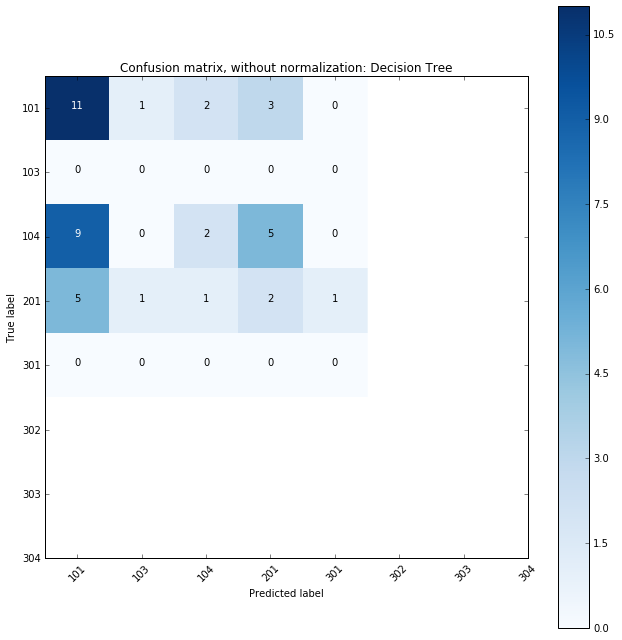

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


122.0
Selected number of features: 88
Train set size after feature selection:  (3116, 88)
Test set size after feature selection:  (253, 88)
Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=6,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'):
             precision    recall  f1-score   support

      101.0    0.34259   0.64912   0.44848        57
      103.0    0.00000   0.00000   0.00000         0
      104.0    0.00000   0.00000   0.00000         6
      201.0    0.00000   0.00000   0.00000         3
      301.0    0.60563   0.33594   0.43216       128
      302.0    0.00000   0.00000   0.00000        11
      303.0    0.14815   0.09302   0.11429        43
      304.0    0.00000   0.00000   0.00000      

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


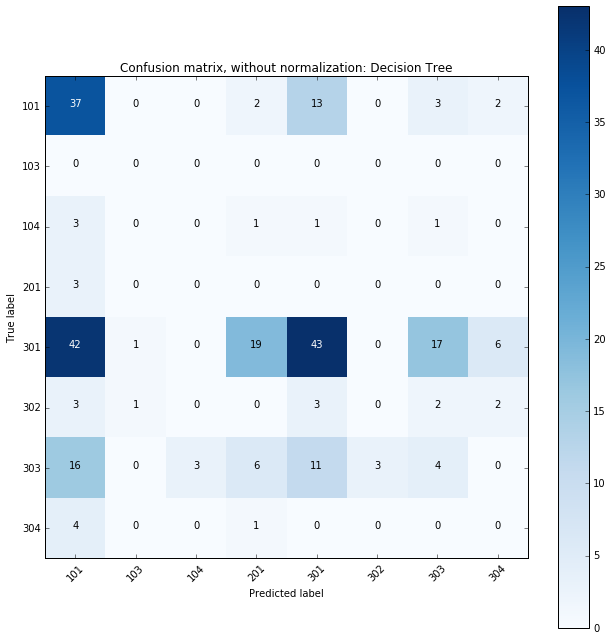

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


115.0
Selected number of features: 88
Train set size after feature selection:  (3218, 88)
Test set size after feature selection:  (151, 88)
Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'):
             precision    recall  f1-score   support

      101.0    0.63043   0.69048   0.65909        42
      103.0    0.00000   0.00000   0.00000         7
      104.0    0.00000   0.00000   0.00000         7
      201.0    0.00000   0.00000   0.00000        18
      301.0    0.38235   0.60465   0.46847        43
      302.0    0.09091   0.11111   0.10000         9
      303.0    0.60000   0.20000   0.30000        15
      304.0    0.35714   0.50000   0.41667      

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


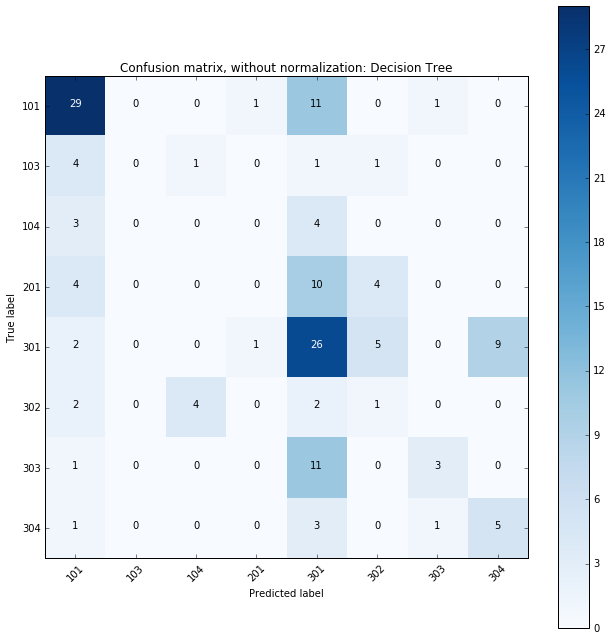

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


104.0
Selected number of features: 88
Train set size after feature selection:  (3264, 88)
Test set size after feature selection:  (105, 88)
Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'):
             precision    recall  f1-score   support

      101.0    0.65306   0.78049   0.71111        41
      103.0    1.00000   0.28571   0.44444         7
      104.0    0.00000   0.00000   0.00000         3
      201.0    0.15385   0.40000   0.22222         5
      301.0    0.75000   0.62069   0.67925        29
      302.0    1.00000   0.83333   0.90909        12
      303.0    0.50000   0.12500   0.20000         8
      304.0    0.00000   0.00000   0.00000      

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


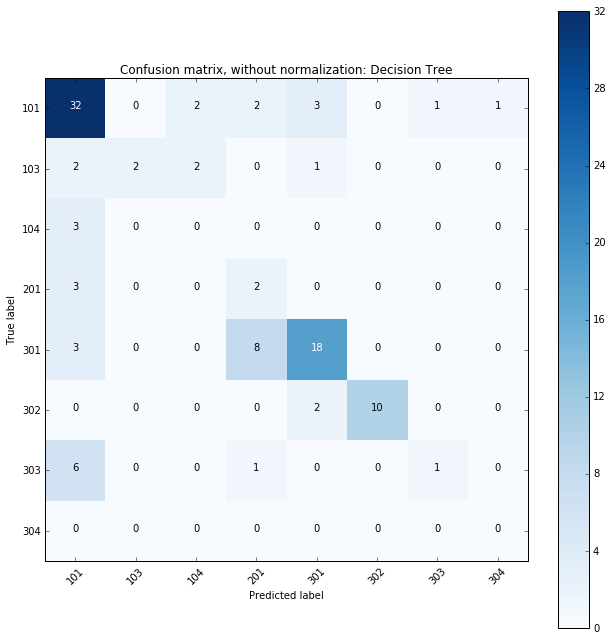

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


111.0
Selected number of features: 88
Train set size after feature selection:  (3258, 88)
Test set size after feature selection:  (111, 88)
Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'):
             precision    recall  f1-score   support

      101.0    0.34615   0.50000   0.40909        36
      103.0    0.00000   0.00000   0.00000         2
      104.0    0.00000   0.00000   0.00000        17
      201.0    0.10000   0.04762   0.06452        21
      301.0    0.05556   0.08333   0.06667        12
      302.0    0.00000   0.00000   0.00000        10
      303.0    0.00000   0.00000   0.00000         2
      304.0    0.16667   0.18182   0.17391     

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


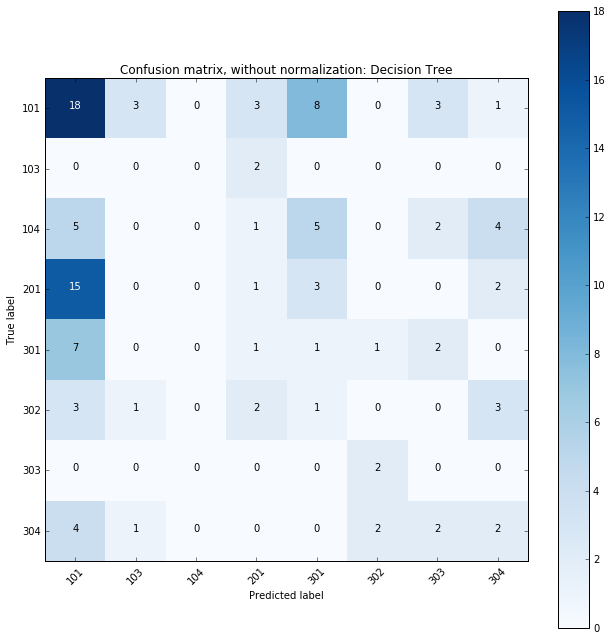

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


107.0
Selected number of features: 88
Train set size after feature selection:  (3225, 88)
Test set size after feature selection:  (144, 88)


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=6,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'):
             precision    recall  f1-score   support

      101.0    0.62069   0.85714   0.72000        21
      103.0    0.00000   0.00000   0.00000         0
      104.0    0.16667   0.09091   0.11765        11
      201.0    0.00000   0.00000   0.00000        31
      301.0    0.48193   0.85106   0.61538        47
      302.0    0.00000   0.00000   0.00000         7
      303.0    0.42857   0.60000   0.50000        10
      304.0    0.33333   0.17647   0.23077        17

avg / total    0.32966   0.47222   0.37681       144


Confusion matrix


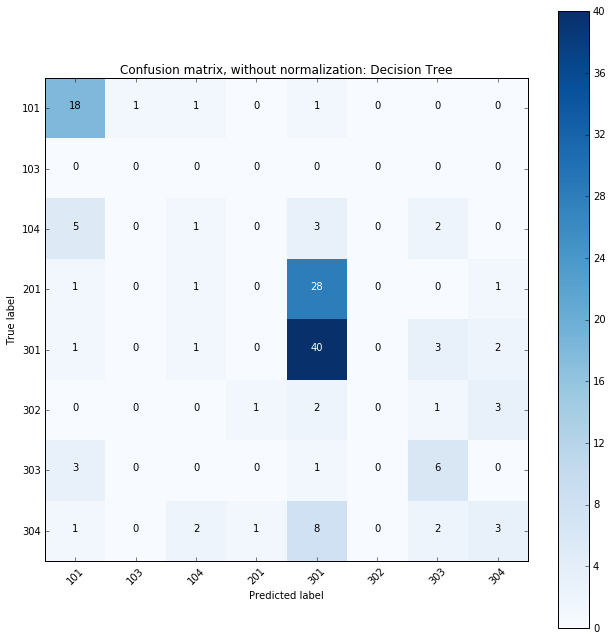

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


112.0
Selected number of features: 88
Train set size after feature selection:  (3236, 88)
Test set size after feature selection:  (133, 88)
Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'):
             precision    recall  f1-score   support

      101.0    0.54545   0.66667   0.60000        27
      103.0    0.50000   0.11111   0.18182         9
      104.0    0.12500   0.09091   0.10526        11
      201.0    0.10000   0.07692   0.08696        13
      301.0    0.39655   0.48936   0.43810        47
      302.0    1.00000   0.25000   0.40000         4
      303.0    0.16667   0.28571   0.21053         7
      304.0    0.77778   0.46667   0.58333      

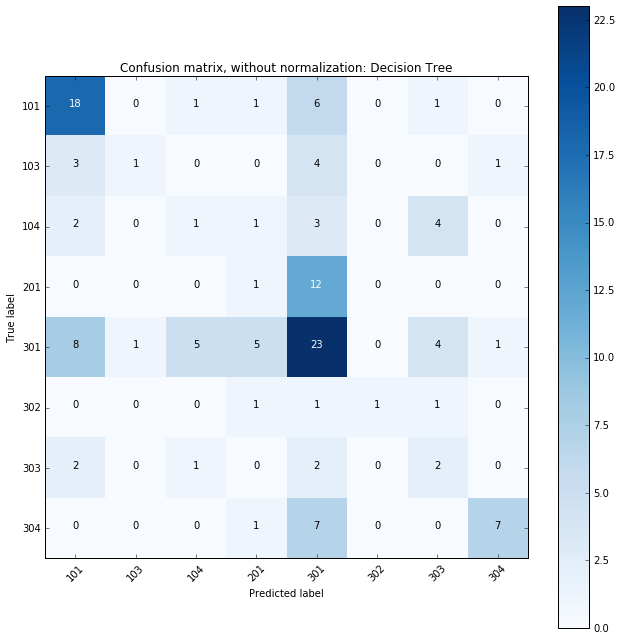

102.0
Selected number of features: 88
Train set size after feature selection:  (3143, 88)
Test set size after feature selection:  (226, 88)
Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'):
             precision    recall  f1-score   support

      101.0    0.68627   0.57851   0.62780       121
      103.0    0.85714   0.75000   0.80000         8
      104.0    0.00000   0.00000   0.00000         3
      201.0    0.17647   0.09375   0.12245        32
      301.0    0.11765   0.37500   0.17910        16
      302.0    1.00000   0.70588   0.82759        17
      303.0    0.10000   0.07692   0.08696        13
      304.0    0.15385   0.12500   0.13793      

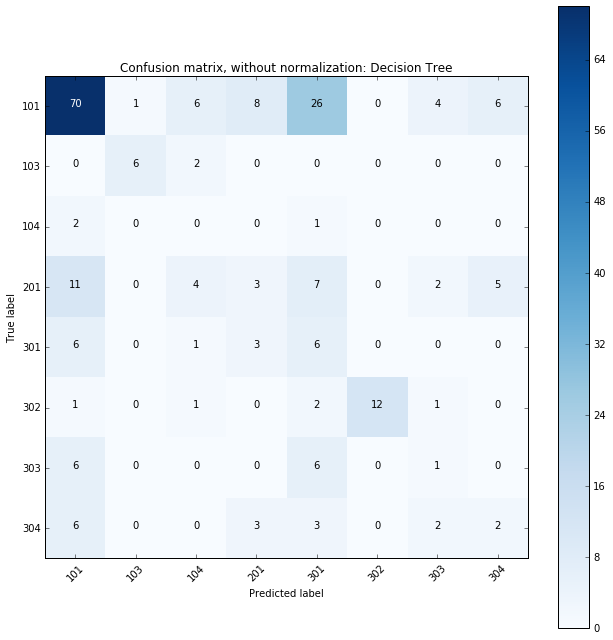

118.0
Selected number of features: 88
Train set size after feature selection:  (3242, 88)
Test set size after feature selection:  (127, 88)
Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'):
             precision    recall  f1-score   support

      101.0    0.87234   0.87234   0.87234        47
      103.0    0.85714   0.60000   0.70588        10
      104.0    0.71429   0.45455   0.55556        11
      201.0    0.14286   0.12500   0.13333         8
      301.0    0.33333   0.60000   0.42857        25
      302.0    0.40000   0.33333   0.36364         6
      303.0    0.71429   0.41667   0.52632        12
      304.0    0.00000   0.00000   0.00000      

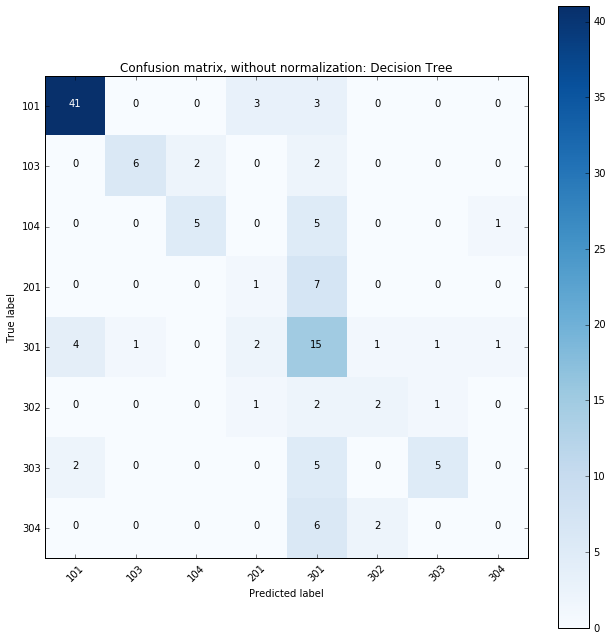

110.0
Selected number of features: 88
Train set size after feature selection:  (3277, 88)
Test set size after feature selection:  (92, 88)
Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=6,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'):
             precision    recall  f1-score   support

      101.0    0.53846   0.30435   0.38889        46
      103.0    0.00000   0.00000   0.00000         4
      104.0    0.50000   0.42857   0.46154         7
      201.0    0.15385   0.28571   0.20000        14
      301.0    0.09091   0.20000   0.12500        10
      302.0    0.00000   0.00000   0.00000         3
      303.0    0.00000   0.00000   0.00000         0
      304.0    0.00000   0.00000   0.00000       

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


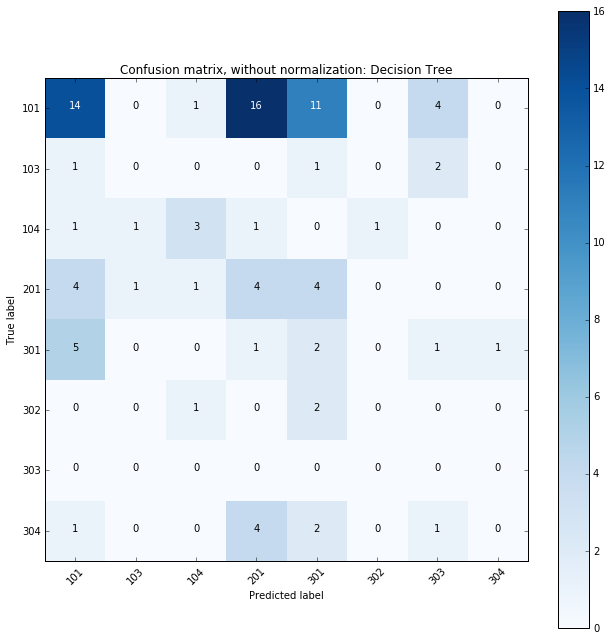

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


103.0
Selected number of features: 88
Train set size after feature selection:  (3176, 88)
Test set size after feature selection:  (193, 88)
Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'):
             precision    recall  f1-score   support

      101.0    0.29032   0.43902   0.34951        41
      103.0    0.00000   0.00000   0.00000         6
      104.0    0.16667   0.11111   0.13333         9
      201.0    0.26923   0.17073   0.20896        41
      301.0    0.35385   0.50000   0.41441        46
      302.0    0.00000   0.00000   0.00000         9
      303.0    0.14286   0.04000   0.06250        25
      304.0    0.23077   0.18750   0.20690      

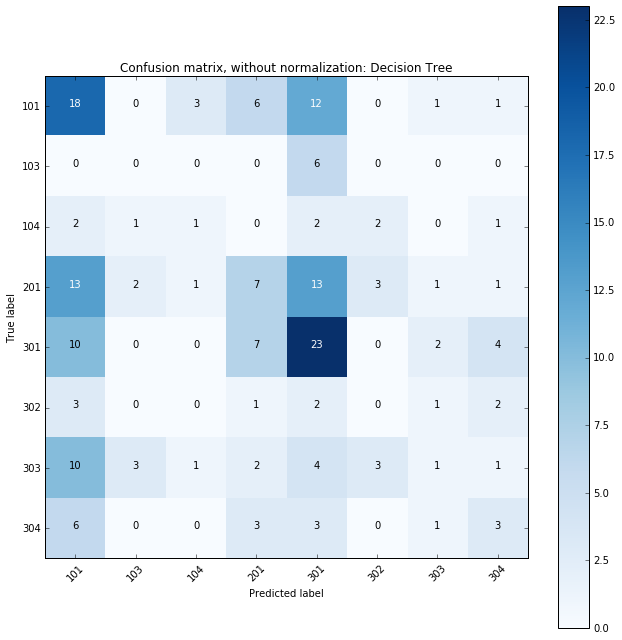

105.0
Selected number of features: 88
Train set size after feature selection:  (3184, 88)
Test set size after feature selection:  (185, 88)
Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=6,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'):
             precision    recall  f1-score   support

      101.0    0.53750   0.61429   0.57333        70
      103.0    0.00000   0.00000   0.00000         1
      104.0    0.00000   0.00000   0.00000        15
      201.0    0.46667   0.17073   0.25000        41
      301.0    0.09524   0.25000   0.13793        16
      302.0    1.00000   0.78261   0.87805        23
      303.0    0.08000   0.12500   0.09756        16
      304.0    0.00000   0.00000   0.00000      

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


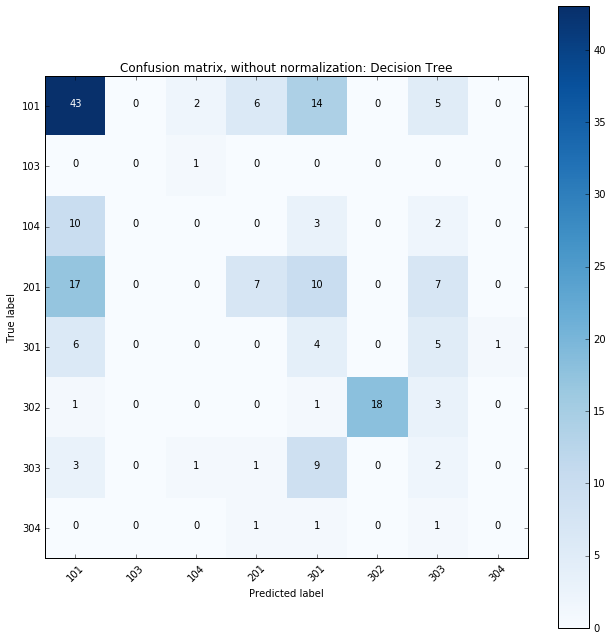

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


109.0
Selected number of features: 88
Train set size after feature selection:  (3226, 88)
Test set size after feature selection:  (143, 88)
Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'):
             precision    recall  f1-score   support

      101.0    0.70000   0.63636   0.66667        66
      103.0    0.00000   0.00000   0.00000         3
      104.0    0.00000   0.00000   0.00000         4
      201.0    0.20000   0.07407   0.10811        27
      301.0    0.19048   0.20000   0.19512        20
      302.0    0.37500   0.50000   0.42857         6
      303.0    0.24138   0.53846   0.33333        13
      304.0    0.00000   0.00000   0.00000      

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


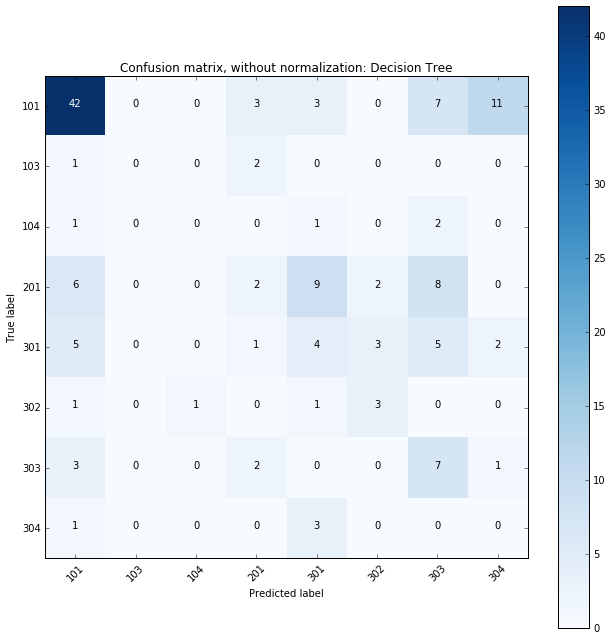

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


117.0
Selected number of features: 88
Train set size after feature selection:  (3305, 88)
Test set size after feature selection:  (64, 88)
Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=6,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'):
             precision    recall  f1-score   support

      101.0    0.59259   0.94118   0.72727        17
      104.0    0.66667   0.22222   0.33333         9
      201.0    0.50000   0.11111   0.18182         9
      301.0    0.33333   0.80000   0.47059        10
      303.0    1.00000   0.13333   0.23529        15
      304.0    0.16667   0.25000   0.20000         4

avg / total    0.61834   0.46875   0.40680        64


Confusion matrix


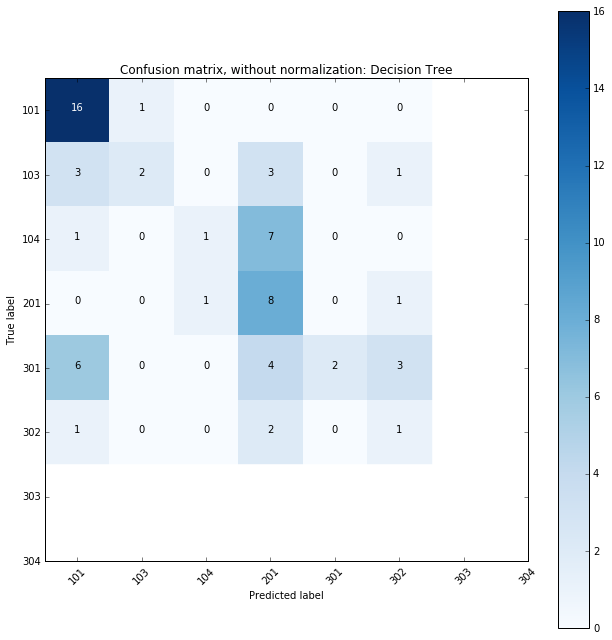

108.0
Selected number of features: 88
Train set size after feature selection:  (3173, 88)
Test set size after feature selection:  (196, 88)
Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=6,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'):
             precision    recall  f1-score   support

      101.0    0.38667   0.43284   0.40845        67
      103.0    0.08333   0.16667   0.11111        12
      104.0    0.00000   0.00000   0.00000         5
      201.0    0.18750   0.14286   0.16216        21
      301.0    0.41379   0.37500   0.39344        64
      302.0    1.00000   0.12500   0.22222         8
      303.0    0.50000   0.09091   0.15385        11
      304.0    0.00000   0.00000   0.00000      

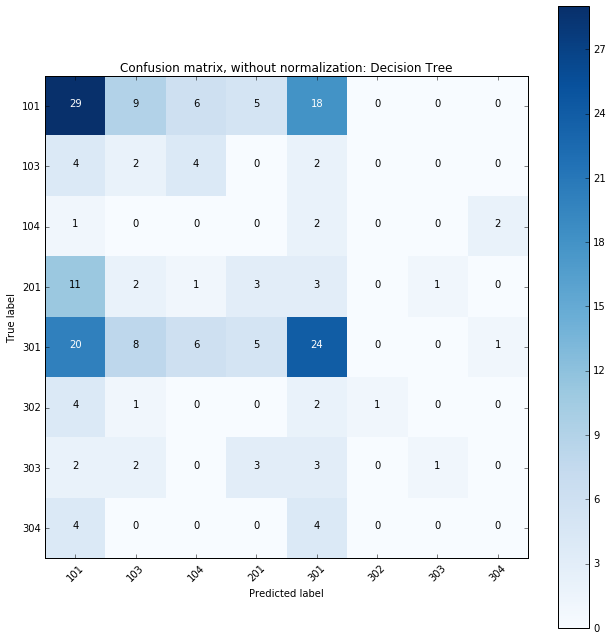

113.0
Selected number of features: 88
Train set size after feature selection:  (3232, 88)
Test set size after feature selection:  (137, 88)
Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=6,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'):
             precision    recall  f1-score   support

      101.0    0.64286   0.93103   0.76056        29
      103.0    0.20000   0.33333   0.25000         3
      104.0    1.00000   0.16667   0.28571        12
      201.0    0.25000   0.07143   0.11111        14
      301.0    0.68493   0.87719   0.76923        57
      302.0    0.00000   0.00000   0.00000         0
      303.0    0.40000   0.12500   0.19048        16
      304.0    0.25000   0.16667   0.20000      

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


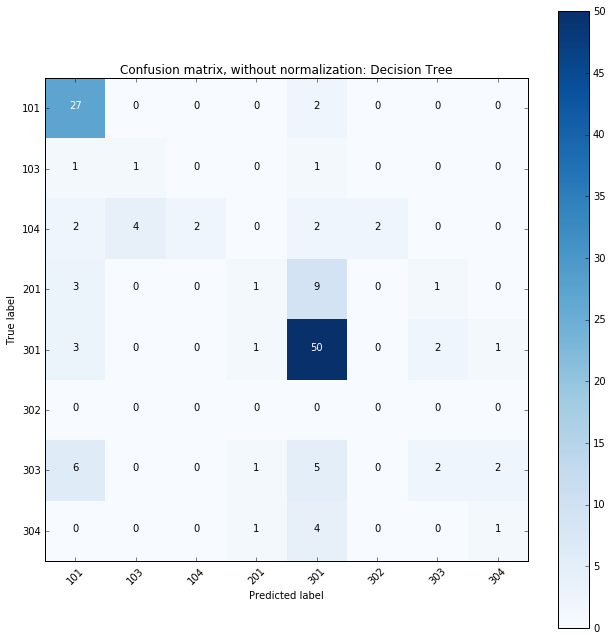

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


120.0
Selected number of features: 88
Train set size after feature selection:  (3311, 88)
Test set size after feature selection:  (58, 88)
Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'):
             precision    recall  f1-score   support

      101.0    0.88889   0.96970   0.92754        33
      103.0    0.00000   0.00000   0.00000         4
      201.0    0.66667   0.33333   0.44444         6
      301.0    0.64286   0.81818   0.72000        11
      302.0    1.00000   1.00000   1.00000         4
      303.0    0.00000   0.00000   0.00000         0

avg / total    0.76560   0.81034   0.77923        58


Confusion matrix


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


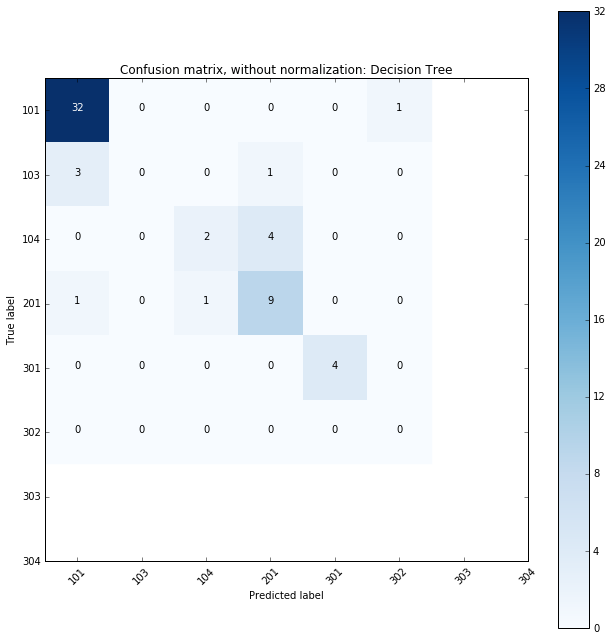

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


101.0
Selected number of features: 88
Train set size after feature selection:  (3146, 88)
Test set size after feature selection:  (223, 88)
Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=8,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'):
             precision    recall  f1-score   support

      101.0    0.85217   0.88288   0.86726       111
      103.0    0.12500   1.00000   0.22222         3
      104.0    0.25000   0.07692   0.11765        13
      201.0    0.47368   0.28125   0.35294        32
      301.0    0.15152   0.26316   0.19231        19
      302.0    0.88889   0.88889   0.88889         9
      303.0    1.00000   0.22222   0.36364         9
      304.0    0.23529   0.14815   0.18182      

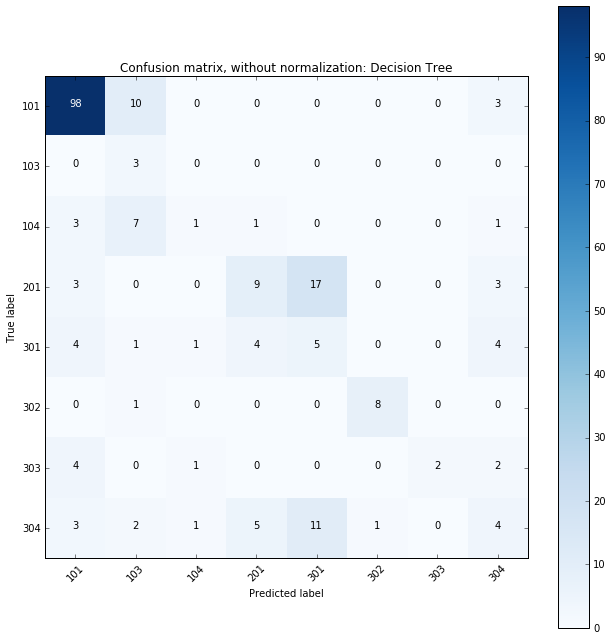

123.0
Selected number of features: 88
Train set size after feature selection:  (3304, 88)
Test set size after feature selection:  (65, 88)
Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'):
             precision    recall  f1-score   support

      101.0    0.85714   0.92308   0.88889        13
      103.0    0.00000   0.00000   0.00000         0
      201.0    1.00000   0.38462   0.55556        13
      301.0    0.45455   0.71429   0.55556        14
      302.0    1.00000   0.93333   0.96552        15
      303.0    1.00000   0.60000   0.75000        10
      304.0    0.00000   0.00000   0.00000         0

avg / total    0.85395   0.72308   0.74674      

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


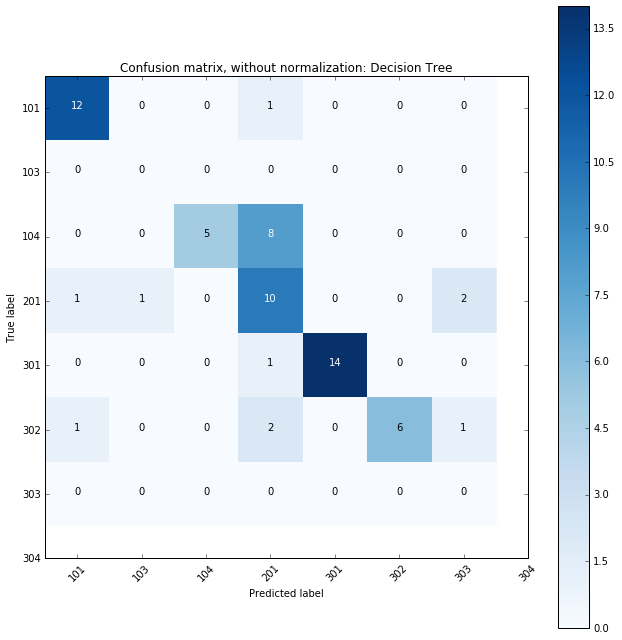

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


106.0
Selected number of features: 88
Train set size after feature selection:  (3191, 88)
Test set size after feature selection:  (178, 88)
Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'):
             precision    recall  f1-score   support

      101.0    0.72727   0.58537   0.64865        41
      103.0    0.00000   0.00000   0.00000         2
      104.0    0.00000   0.00000   0.00000         4
      201.0    0.26923   0.21875   0.24138        32
      301.0    0.36842   0.50000   0.42424        56
      302.0    1.00000   0.60000   0.75000         5
      303.0    0.57143   0.14815   0.23529        27
      304.0    0.04167   0.09091   0.05714       

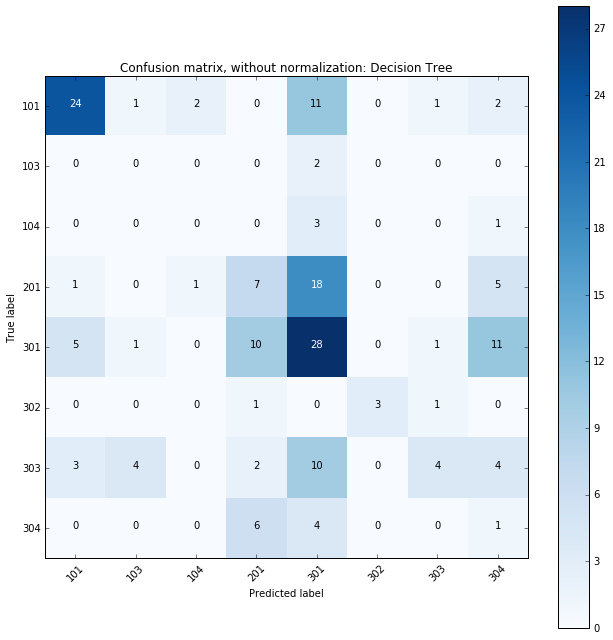

124.0
Selected number of features: 88
Train set size after feature selection:  (3285, 88)
Test set size after feature selection:  (84, 88)
Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'):
             precision    recall  f1-score   support

      101.0    0.21429   0.31579   0.25532        19
      103.0    0.00000   0.00000   0.00000         0
      104.0    0.60000   0.16667   0.26087        18
      201.0    0.05882   0.08333   0.06897        12
      301.0    0.06250   0.33333   0.10526         3
      302.0    0.00000   0.00000   0.00000         4
      303.0    0.00000   0.00000   0.00000        19
      304.0    0.33333   0.22222   0.26667       

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


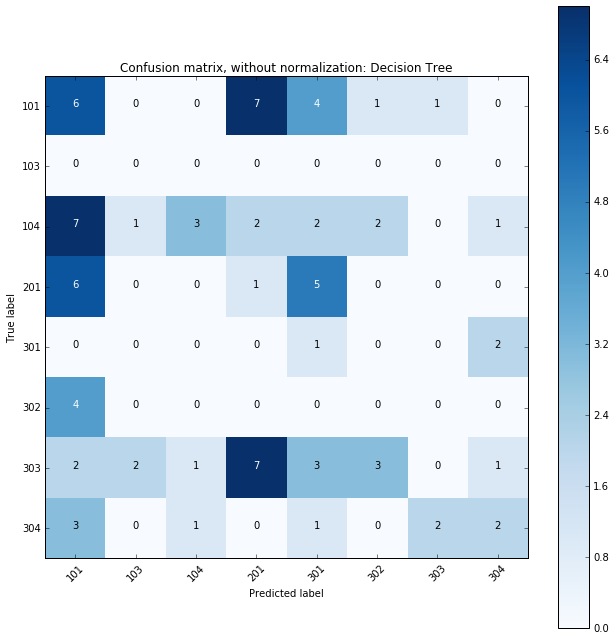

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


119.0
Selected number of features: 88
Train set size after feature selection:  (3252, 88)
Test set size after feature selection:  (117, 88)
Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'):
             precision    recall  f1-score   support

      101.0    0.40000   0.41667   0.40816        24
      103.0    0.00000   0.00000   0.00000         5
      104.0    0.00000   0.00000   0.00000         0
      201.0    0.09091   0.09091   0.09091        11
      301.0    0.63235   0.75439   0.68800        57
      302.0    0.00000   0.00000   0.00000         0
      303.0    0.25000   0.05000   0.08333        20

avg / total    0.44140   0.47009   0.44170     

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


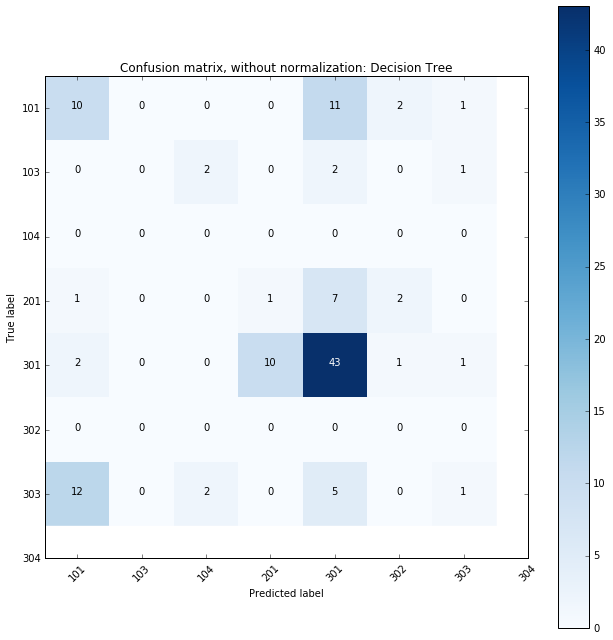

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


116.0
Selected number of features: 88
Train set size after feature selection:  (3196, 88)
Test set size after feature selection:  (173, 88)
Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=6,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'):
             precision    recall  f1-score   support

      101.0    0.90588   0.81915   0.86034        94
      104.0    0.00000   0.00000   0.00000        15
      201.0    0.44444   0.80000   0.57143        15
      301.0    0.31250   0.68182   0.42857        22
      303.0    0.25000   0.13333   0.17391        15
      304.0    0.40000   0.16667   0.23529        12

avg / total    0.61991   0.62428   0.60291       173


Confusion matrix


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


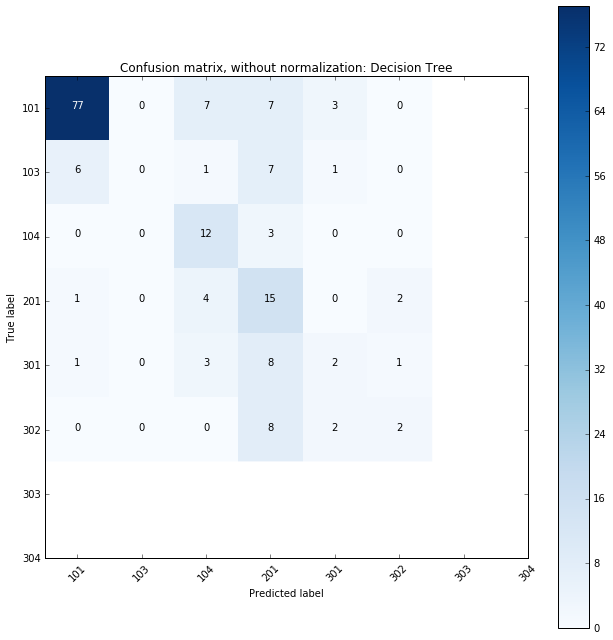

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


121.0
Selected number of features: 88
Train set size after feature selection:  (3201, 88)
Test set size after feature selection:  (168, 88)
Classification report for classifier DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=6,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'):
             precision    recall  f1-score   support

      101.0    0.78049   0.91429   0.84211        35
      103.0    1.00000   0.50000   0.66667         2
      104.0    0.00000   0.00000   0.00000         5
      201.0    0.31034   0.50000   0.38298        18
      301.0    0.81333   0.63542   0.71345        96
      302.0    0.20000   1.00000   0.33333         1
      303.0    0.00000   0.00000   0.00000         6
      304.0    0.10000   0.20000   0.13333       

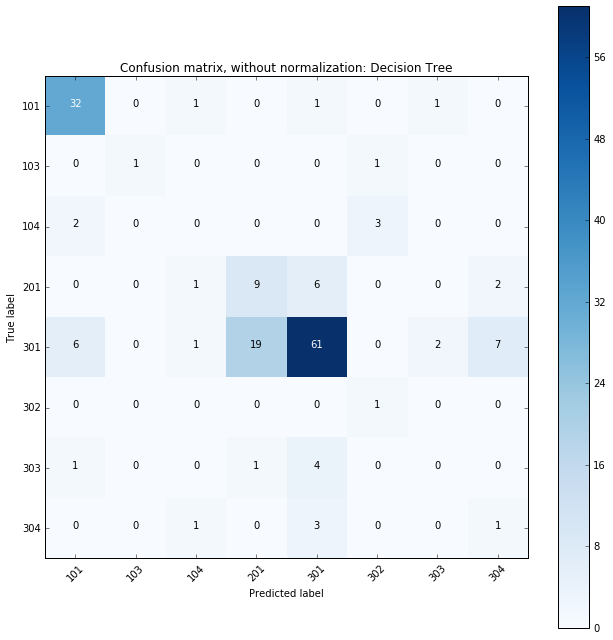

In [13]:
# a = []
print('Number of subjects: ', len(groups))

results = {}

for g in groups: 
    print(g)
    test = df.loc[(df.subject == g)]
    train = df.loc[(df.subject != g)]
    
    features = select_features(train[features], train['activity'])    
    
    X_train = train[features]
    y_train = train['activity']
    print("Train set size after feature selection: ", X_train.shape)
    
    X_test = test[features]
    y_test = test['activity']
    print("Test set size after feature selection: ", X_test.shape)    
    
    models = grid(X_train,y_train)
    
    #fitting models to test_data
    for model in models:
        res = test_classifier (model, X_train, y_train, X_test, y_test)
        if model[2] not in results:
            results[model[2]] = [[],[]]
        results[model[2]][0].append(res[0])
        results[model[2]][1].append(res[1])
    
#     a.append(run(pram,X_train,y_train,X_test,y_test))
# avg = np.array(a)
# print(np.mean(avg))    

Decision Tree :
Average Weighted F1-score:  0.441582333523
Confusion matrix


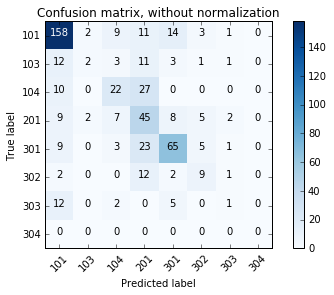

{'Decision Tree': [0.44158233352302645, array([[158,   2,   9,  11,  14,   3,   1,   0],
       [ 12,   2,   3,  11,   3,   1,   1,   0],
       [ 10,   0,  22,  27,   0,   0,   0,   0],
       [  9,   2,   7,  45,   8,   5,   2,   0],
       [  9,   0,   3,  23,  65,   5,   1,   0],
       [  2,   0,   0,  12,   2,   9,   1,   0],
       [ 12,   0,   2,   0,   5,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0]])]}


In [15]:
results_average = {}
for key, value in results.items():
    #print("key",key)
    #print("val",value)
    results_average[key] = []
    results_average[key].append(np.mean(value[0]))
    
    conf_mat_sum = np.array([[0 for col in range(8)] for row in range(8)])
    for x in value[1]:
        #print(len(x))
        #print(len(conf_mat_sum))
        #print(conf_mat_sum)
        #print(x)
        if len(conf_mat_sum) > len(x):
            c = conf_mat_sum.copy()
            c[:x.shape[0],:x.shape[1]] +=  x
        conf_mat_sum = c
    
    results_average[key].append(conf_mat_sum)
    
    print(key,':')
    print("Average Weighted F1-score: ", results_average[key][0])
    
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(conf_mat_sum, classes=class_names, title='Confusion matrix, without normalization')

    plt.show()
    
    
print(results_average)